In [1]:
import pandas as pd
import numpy as np
import re

from textblob import TextBlob, Word

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv('df_final_no_numbers.csv')
df.subtitle = df.subtitle.apply(lambda x: 0 if x == '-' else 1)
df.subtitle = df.subtitle.apply(str)
df = df[(df['publication'] != 'personal-growth') & (df['publication'] != 'uxplanet')]
df.reset_index(drop=True, inplace=True)

In [24]:
df.publication.unique()

array(['towardsdatascience', 'swlh', 'writingcooperative',
       'datadriveninvestor', 'uxdesign', 'the-mission', 'startup-grind',
       'better-humans', 'better-marketing'], dtype=object)

In [3]:
df.head()

,date,title,subtitle,claps,responses,author_handle,story_url,reading_time,text,author_followers,publication,number_of_words,number_of_characters,day_of_the_week,month,polarity,subjectivity,claps_per_quartile,claps_binary
0,01/01/2020,making python program blazingly fast,1,3400.0,3,@martin.heinz,https://towardsdatascience.com/making-python-p...,5,making python program blazingly fast let look ...,3800.0,towardsdatascience,1056,6175,2,1,0.049713,0.407731,3,1
1,01/01/2020,implementing fully convolutional network fcn t...,1,543.0,4,@himanshurawlani,https://towardsdatascience.com/implementing-a-...,11,understanding implementing fully convolutional...,331.0,towardsdatascience,2527,15729,2,1,0.110434,0.398271,3,1
2,01/01/2020,new feature python python newbie,1,1800.0,4,@edenau,https://towardsdatascience.com/6-new-features-...,4,python beginner new feature python python newb...,1700.0,towardsdatascience,712,4174,2,1,0.081111,0.470741,3,1
3,01/01/2020,fancy python,1,1700.0,12,@dipam44,https://towardsdatascience.com/how-to-be-fancy...,5,fancy python python cool really cool however l...,625.0,towardsdatascience,607,3328,2,1,0.209636,0.480786,3,1
4,01/01/2020,scratch search playing data elasticsearch inge...,1,239.0,1,@stanislavprihoda,https://towardsdatascience.com/from-scratch-to...,9,scratch search playing data elasticsearch inge...,88.0,towardsdatascience,2158,14087,2,1,0.090842,0.435970,3,1


LDA is based on wordcounts and not distributions

In [3]:
stops = set(nltk.corpus.stopwords.words('english'))

In [9]:
stops = stops.union(['use', 'using', 'way', 'dont'])

In [10]:
vectorizer = CountVectorizer(stop_words=stops)
X = vectorizer.fit_transform(df['text'])

In [6]:
df.publication.unique()

array(['towardsdatascience', 'swlh', 'writingcooperative',
       'datadriveninvestor', 'uxdesign', 'the-mission', 'startup-grind',
       'better-humans', 'better-marketing'], dtype=object)

In [14]:
lda = LatentDirichletAllocation(
    n_components=6, # default: 10
    random_state=12345,
)

lda.fit(X)

LatentDirichletAllocation(n_components=6, random_state=12345)

In [17]:
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

/Users/ariklevy/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


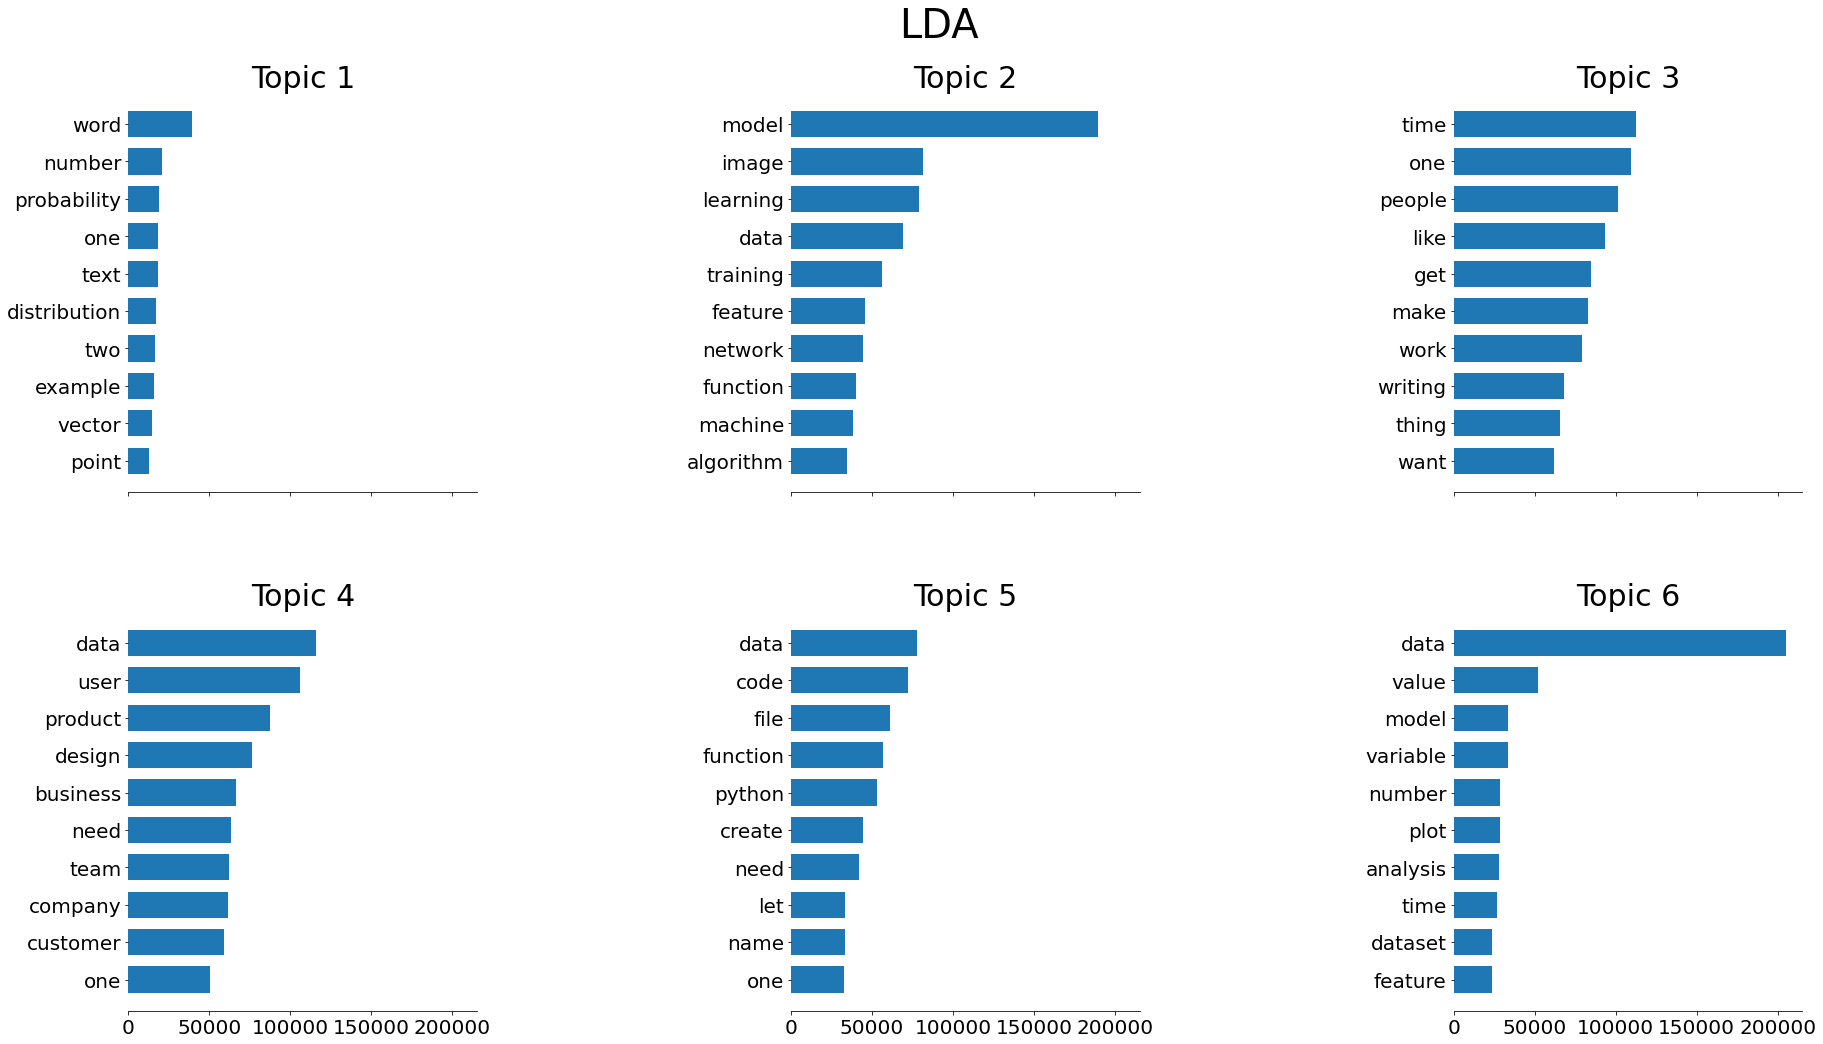

In [18]:
feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names);

------

------

In [19]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [22]:
from nltk.tokenize import RegexpTokenizer

In [23]:
tokenizer = RegexpTokenizer(r'\w+')

In [21]:
docs = [df.text]

0        making python program blazingly fast let look ...
1        understanding implementing fully convolutional...
2        python beginner new feature python python newb...
3        fancy python python cool really cool however l...
4        scratch search playing data elasticsearch inge...
                               ...                        
69130    svbs access innovation program building divers...
69131    dei month meet vortle dei month startup grind ...
69132    privileged catch joe discus future company hop...
69133    startup share thing matter startup need succes...
69134    privileged sit robert doore president ceo dive...
Name: text, Length: 69135, dtype: object